# ANLY-590 Assignment 2
## Yingjie(Chelsea) Wang

## Question1: Feedforward: Building a ReLU neural net-work
Consider the rectified linear activation function : $h_j = \max(0, a_j)$.

### 1. Draw a network with:
   - 2 inputs
   - 1 hidden layers with 3 hidden units and a
   - 1-class output (for binary classification)

![title](hw2_1.png)

### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

Linear part: weighted sum of inputs plus bias
$$a_1 = w_{11}*x_1 + w_{21}*x_2 + b_1$$
$$a_2 = w_{12}*x_1 + w_{22}*x_2 + b_2$$
Thus,
$$a_i = w_{1i}*x_1 + w_{2i}*x_1 + b_{i} = \vec{x}W + \vec{b} $$

Non-linear part: transformation of that sum by a nonlinearity of our choose
$$ \vec{h} = f(\vec{x}W + \vec{b})$$

$$ y = g(v_1h_1+v_2h_2+v_3h_3+b_{y}) = g(\vec{v}^{T} \vec{h} + b_y)$$

where $f = ReLU$ and $g = sigmoid$

### 3. Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# ReLU function
def ReLU(x):
    return np.maximum(0,x)

In [3]:
def ff_nn_ReLu(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    
    h = ReLU(np.dot(x,w) + b_1)
    y = sigmoid(np.dot(h,v) + b_2) # binary classification

    return np.array(y)

### 4. Suppose you have the following set of weight matrices:

$W^{(1)} = \begin{bmatrix} 1 & -1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix}$

$b^{(1)} = \begin{bmatrix} 0 , 0 , -1 \end{bmatrix}^T$

$V = \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix}$

$c = \begin{bmatrix} 1 \end{bmatrix}$

and a few inputs

$X = \begin{bmatrix} 1 & -1 \\ 0 & -1 \\ 0 & 1 \end{bmatrix}$

what are the class probabilities associated with the forward pass of each
sample?

In [4]:
W = np.array([[1, -1, 0],[0, 0, 1/2]]).reshape(2,3)
h_b = np.array([0, 0, 1]).reshape(1, 3)
v = np.array([1, 0, -1]).reshape(3, 1)
y_b = 1
X = np.array([[1, -1],[0, -1],[0, 1]]).reshape((3, 2))
ff_nn_ReLu(X, W, v, h_b, y_b)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## Question2: Consider a simple non-convex function of two variables:

$$f(x,y) = (1-x^3)+100*(y^2-x)^2$$

### 1. What are the partial derivatives of f with respect to x and to y?

$$\frac{\partial}{\partial x}((1-x^3)+100*(y^2-x)^2) = 200x-3x^2-200y^2$$

$$\frac{\partial}{\partial y}((1-x^3)+100*(y^2-x)^2) = 400y(-x+y^2)$$

### 2. Create a visualization of the contours of the Rosenbrock function.

In [5]:
def rosenbrock(x,y):
    return (1 - x**3) + 100*(y**2 - x)**2

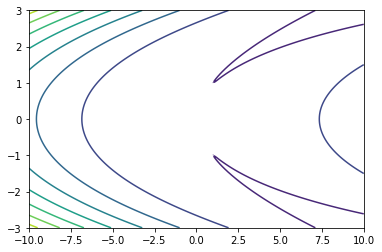

In [6]:
delta = 0.025
x = np.linspace(-10, 10, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = 200*x - 3*x**2 - 200*y**2
    df_dy = 400*y*(-x+y**2)
    return np.array([df_dx, df_dy])

In [8]:
def grad_descent(starting_point=None, iterations=10, learning_rate=0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

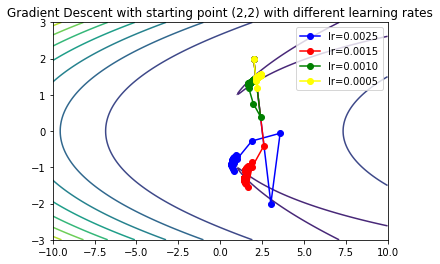

In [9]:
np.random.seed(10)
traj_1 = grad_descent(starting_point=[2,2], iterations=50, learning_rate=0.0025)
traj_2 = grad_descent(starting_point=[2,2], iterations=50, learning_rate=0.0015)
traj_3 = grad_descent(starting_point=[2,2], iterations=50, learning_rate=0.0010)
traj_4 = grad_descent(starting_point=[2,2], iterations=50, learning_rate=0.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x_1 = traj_1[:,0]
y_1 = traj_1[:,1]

x_2 = traj_2[:,0]
y_2 = traj_2[:,1]

x_3 = traj_3[:,0]
y_3 = traj_3[:,1]

x_4 = traj_4[:,0]
y_4 = traj_4[:,1]

plt.plot(x_1, y_1, '-o', color='blue', label='lr=0.0025')
plt.plot(x_2, y_2, '-o', color='red', label='lr=0.0015')
plt.plot(x_3, y_3, '-o', color='green', label='lr=0.0010')
plt.plot(x_4, y_4, '-o', color='yellow', label='lr=0.0005')
plt.title('Gradient Descent with starting point (2,2) with different learning rates')
plt.legend()
plt.show()

### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [10]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
        trajectory = [point]
        v = np.zeros(len(point))
    else:
        point = np.random.uniform(-10,10, size=2)
        trajectory = [point]
        v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

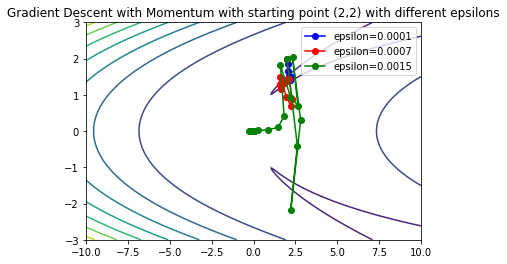

In [11]:
np.random.seed(10)
traj_eps_1 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0001, alpha=.5)
traj_eps_2 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0007, alpha=.5)
traj_eps_3 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0015, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x_eps_1 = traj_eps_1[:,0]
y_eps_1 = traj_eps_1[:,1]

x_eps_2 = traj_eps_2[:,0]
y_eps_2 = traj_eps_2[:,1]

x_eps_3 = traj_eps_3[:,0]
y_eps_3 = traj_eps_3[:,1]

plt.plot(x_eps_1, y_eps_1, '-o', color = 'blue', label = 'epsilon=0.0001')
plt.plot(x_eps_2, y_eps_2, '-o', color = 'red', label = 'epsilon=0.0007')
plt.plot(x_eps_3, y_eps_3, '-o', color = 'green', label = 'epsilon=0.0015')
plt.title('Gradient Descent with Momentum with starting point (2,2) with different epsilons')
plt.legend()
plt.show()

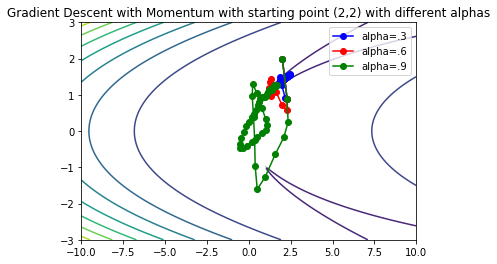

In [12]:
np.random.seed(10)
traj_alpha_1 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0007, alpha=.3)
traj_alpha_2 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0007, alpha=.6)
traj_alpha_3 = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0007, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x_alpha_1 = traj_alpha_1[:,0]
y_alpha_1 = traj_alpha_1[:,1]

x_alpha_2 = traj_alpha_2[:,0]
y_alpha_2 = traj_alpha_2[:,1]

x_alpha_3 = traj_alpha_3[:,0]
y_alpha_3 = traj_alpha_3[:,1]

plt.plot(x_alpha_1, y_alpha_1, '-o', color = 'blue', label = 'alpha=.3')
plt.plot(x_alpha_2, y_alpha_2, '-o', color = 'red', label = 'alpha=.6')
plt.plot(x_alpha_3, y_alpha_3, '-o', color = 'green', label = 'alpha=.9')
plt.title('Gradient Descent with Momentum with starting point (2,2) with different alphas')
plt.legend()
plt.show()

## Question3: Backprop

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

This model has 13 free parameters. Assume ReLu activations in the hidden layer and a sigmoid output for the classifier. Loss function will be binary cross-entropy.
$$in_1 = x_1w_{11} + x_2w_{21} + b_1$$
$$in_2 = x_1w_{12} + x_2w_{22} + b_2$$
$$in_3 = x_1w_{13} + x_2w_{23} + b_3$$
$$out_1 = ReLU(in_1)$$
$$out_2 = ReLU(in_2)$$
$$out_3 = ReLU(in_3)$$
$$net = v_1out_1 + v_2out_2 + v_3out_3 + b_y$$
$$\hat y = Sigmoid(net)$$
Since for sigmoid function $$\sigma(x) = \frac{1}{1+e^{-x}}$$
$$\frac{d}{dx} \sigma(x) = \sigma(x)(1-\sigma(x))$$

for RelU function $$ReLU(x) = max(0,x)$$
$$\frac{d}{dx} max(0,x) = \left\{
                \begin{array}{ll}
                      0  if x<0 \\
                      1  if x>0
                \end{array}
              \right.$$

Since $$L = -y_i log(\hat y_i) - (1-y_i)log(1-\hat y_i)$$
$$\frac{dL}{d \hat y_i} = -(\frac{y_i}{\hat y_i} - \frac{1-y_i}{1-\hat y_i})$$

We have
$$\frac{\partial L}{\partial b_y} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial b_y} =  -(\frac{y_i}{\hat y_i} - \frac{1-y_i}{1-\hat y_i}) (\hat y_i (1 - \hat y_i))$$

$$\frac{\partial L}{\partial v_1} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_1} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_1$$

$$\frac{\partial L}{\partial v_2} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_2} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_2$$

$$\frac{\partial L}{\partial v_3} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_3} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_3$$

$$\frac{\partial L}{\partial b_1} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial b_1} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)$$

$$\frac{\partial L}{\partial b_2} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial b_2} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)$$

$$\frac{\partial L}{\partial b_3} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial b_3} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)$$


$$\frac{\partial L}{\partial w_{11}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial w_{11}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)x_1$$

$$\frac{\partial L}{\partial w_{21}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial w_{21}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)x_2$$


$$\frac{\partial L}{\partial w_{12}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial w_{12}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)x_1$$

$$\frac{\partial L}{\partial w_{22}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial w_{22}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)x_2$$

$$\frac{\partial L}{\partial w_{13}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial w_{13}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)x_1$$

$$\frac{\partial L}{\partial w_{23}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial w_{23}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)x_2$$


### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.


In [13]:
def cross_entropy_loss(y, y_hat):
    # Binary cross entropy
    total = y * np.log(y_hat)+(1-y)*np.log(1-y_hat)
    return -total.sum()

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def randomized_weights_bias():
    W = np.random.randn(6).reshape(2,3)
    V = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    b_y = np.random.randn(1)
    return (W, V, b, b_y)

In [14]:
def grad_f(x, y, params):
    """
    Computes local gradient vector for cross entropy loss on binary classification
    """
    W, V, b, b_y = params
    a = np.dot(x, W) + b
    h = ReLU(a)
    y_hat = sigmoid(np.dot(h, V) + b_y)
    
    dL_dby = (y_hat-y).sum()
    dL_dv = h.T.dot(y_hat-y)
    dL_db =((y_hat-y).dot(V.T)*relu_derivative(a)).sum(axis=0)
    dL_dw = x.T.dot((y_hat-y).dot(V.T)*relu_derivative(a))
    return (dL_dw, dL_dv, dL_db, dL_dby)

x = np.random.randn(1000).reshape((500,2))
y = np.random.randn(500).reshape((500,1))
grad_f(x, y, randomized_weights_bias())


(array([[169.81964206,  -4.38050347, -59.53826211],
        [343.102931  , -57.76600602,   3.60316769]]), array([[235.152496  ],
        [320.7825856 ],
        [ 13.34168199]]), array([ 350.53909496, -110.13197339,  -42.91840233]), 296.8231394797688)

### 3. Generate a synthetic dataset like the XOR pattern (see below).


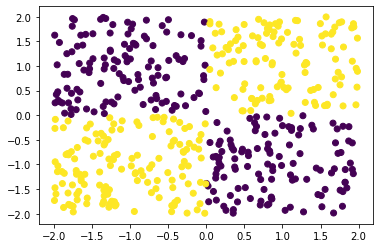

In [15]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros((500,1))
y[np.logical_and(x[:,0]>0, x[:,1]>0)] = 1
y[np.logical_and(x[:,0]<0, x[:,1]<0)] = 1
plt.scatter(x[:,0],x[:,1],c=y[:,0])

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [16]:
def predict(x, params):
    W, V, b, b_y = params
    h = ReLU(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + b_y) # binary classification
    return y

In [17]:
def grad_descent_xor(x, y, starting_point=None, iterations=10, learning_rate=1e-1):
    """
    Estimate binary classification using gradient descent.
    
    Args
        x (np.array) 
        y (np.array)
        starting_point initialization point for gradient descent
        iterations (int) number of iterations before stopping
        learning_rate (float) 
        
    
    Returns
        (np.array) trajectory through parameter space towards minimum
        (np.array) total loss metric throughout gradient descent iterations
    """
    
    point = starting_point
    trajectory = [point]
    losses = [cross_entropy_loss(y, predict(x, point))]
    
    for i in range(iterations):
        grads = grad_f(x, y, point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, predict(x, point)))
    return (np.array(trajectory), losses)


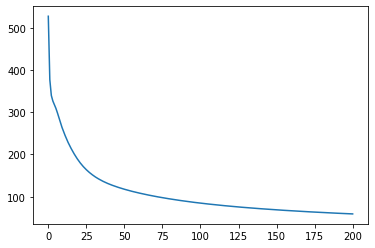

In [18]:
traj, losses = grad_descent_xor(x, y, starting_point=randomized_weights_bias(), iterations=200, learning_rate=1e-3)
plt.plot(losses)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.


In [19]:
def grad_descent_with_momentum_xor(x, y, starting_point, iterations=10, epsilon=1e-2, alpha=0.001):
    point = starting_point 
    trajectory = [point]
    losses = [cross_entropy_loss(y, predict(x, point))]
    vs = np.zeros(len(starting_point))
    
    for i in range(iterations):
        grads = grad_f(x,y,point)
        update = []  
        for (matrix, grad, v) in zip(point, grads, vs):
            update.append(matrix - epsilon*grad-alpha*v)
        
        vs = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(cross_entropy_loss(y, predict(x, point)))
        
    return (np.array(trajectory), losses)

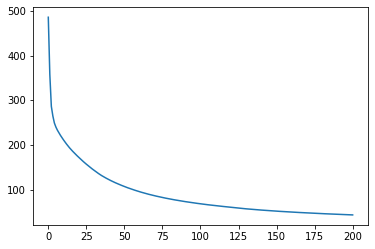

In [25]:
traj, losses = grad_descent_with_momentum_xor(x, y, starting_point=randomized_weights_bias(), iterations=200, epsilon=2e-3, alpha=0.00001)
plt.plot(losses)

Based on the visualization above, grad_descent_with_momentum takes less iterations to converge than grad_descent. Therefore, grad_descent_with_momentum converge more efficiently.

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


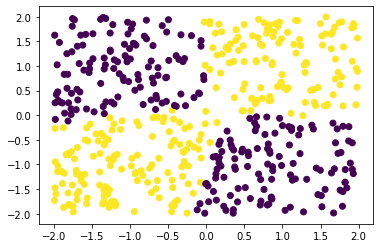

In [26]:
y_pred = predict(x, traj[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_pred[:,0])

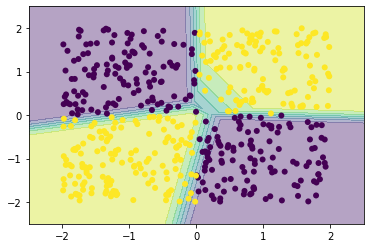

In [27]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
labels = predict(np.c_[xx.ravel(), yy.ravel()], traj[-1])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
# Get predicted labels on training data and plot
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()